<a href="https://colab.research.google.com/github/atheshpramasivam6725-dotcom/Online-Retail-Data-Analysis-using-python/blob/main/Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print ("hello world")

hello world


In [5]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Step 2: Load Dataset
data    = pd.read_csv('/content/online_retail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom


First 5 rows:
   InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom  

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172981 entries, 0 to 172980
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --

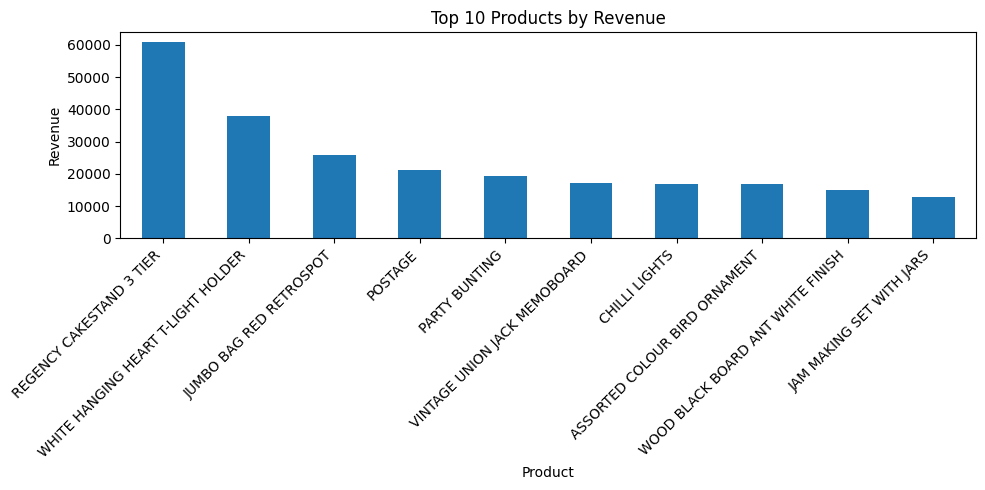

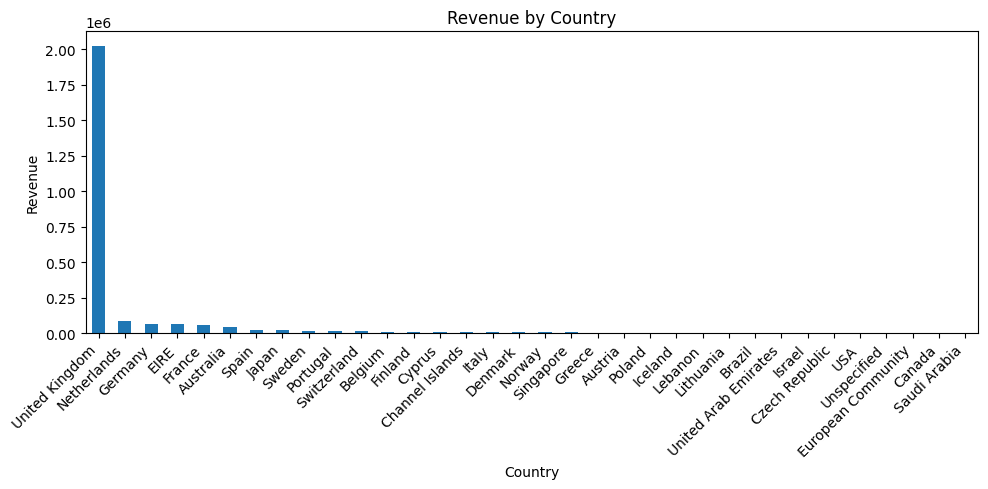

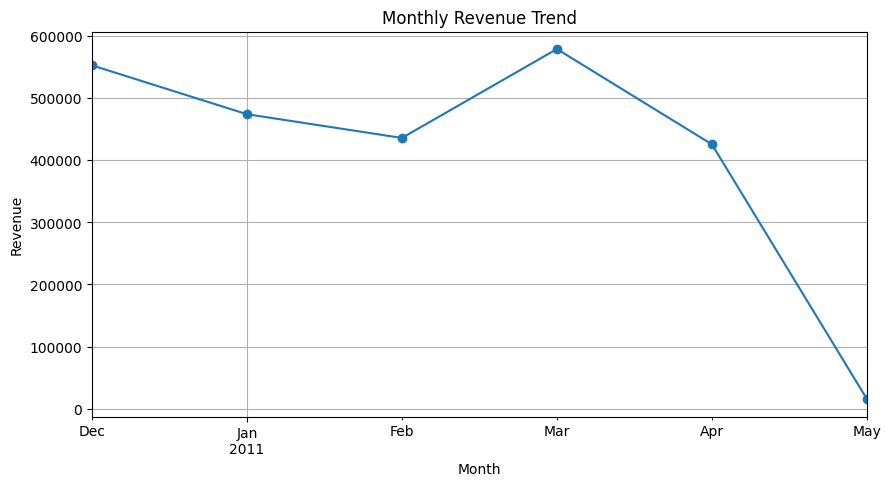

In [9]:

# Step 3: Quick Overview
print("First 5 rows:\n", data.head())
print("\nData Info:\n")
print(data.info())

# Step 4: Data Cleaning
# Remove duplicates
data = data.drop_duplicates()

# Handle missing CustomerID
data = data.dropna(subset=['CustomerID'])

# Step 5: Add Calculated Columns
# Corrected Price -> UnitPrice
data['Revenue'] = data['Quantity'] * data['UnitPrice']

# If Profit column doesn't exist, create a dummy one (optional)
if 'Profit' not in data.columns:
    data['Profit'] = data['Revenue'] * 0.3  # Assume 30% profit margin

data['Profit_Margin'] = (data['Profit'] / data['Revenue']) * 100

# Step 6: Aggregate KPIs
total_sales = data['Revenue'].sum()
total_orders = data['InvoiceNo'].nunique()  # Changed to InvoiceNo
avg_order_value = total_sales / total_orders
top_products = data.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)
sales_by_region = data.groupby('Country')['Revenue'].sum()

print("\n--- KPI Summary ---")
print("Total Sales: ₹", total_sales)
print("Total Orders:", total_orders)
print("Average Order Value: ₹", round(avg_order_value, 2))
print("\nTop Products by Revenue:\n", top_products)
print("\nSales by Region:\n", sales_by_region)

# Step 7: Save Cleaned Data
import os
os.makedirs('data', exist_ok=True)
data.to_csv('data/online_retail_cleaned.csv', index=False)
print("\nCleaned data saved as 'online_retail_cleaned.csv' in data folder.")



# Top 10 Products
top_products.plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Products by Revenue')
plt.ylabel('Revenue')
plt.xlabel('Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Sales by Country
sales_by_region.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Revenue by Country')
plt.ylabel('Revenue')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], dayfirst=True)
monthly_sales = data.groupby(data['InvoiceDate'].dt.to_period('M'))['Revenue'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.grid()
plt.show()
